# Activation Functions

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:65: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


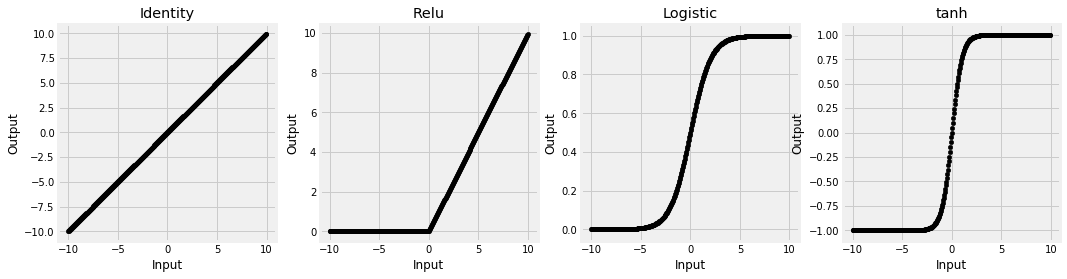

In [238]:
import numpy as np
import pandas as pd

fig, axs = plt.subplots(1, 4, figsize=(16, 4))

theta = np.arange(-10, 10, 0.05)
identity = theta
logistic = 1 / (1 + np.exp(-1 * theta))
relu = np.maximum(0, theta)
tanh = np.tanh(theta)


pd.DataFrame(
    {
        'theta': theta,
        'identity': identity
    }
).plot(
    title='Identity', 
    kind='scatter', x='theta', y='identity', 
    color='k',
    ax=axs[0]
)

pd.DataFrame(
    {
        'theta': theta,
        'relu': relu
    }
).plot(
    title='Relu', 
    kind='scatter', x='theta', y='relu', 
    color='k',
    ax=axs[1]
)

pd.DataFrame(
    {
        'theta': theta,
        'logistic': logistic
    }
).plot(
    title='Logistic', 
    kind='scatter', x='theta', y='logistic', 
    color='k',
    ax=axs[2]
)

pd.DataFrame(
    {
        'theta': theta,
        'tanh': tanh
    }
).plot(
    title='tanh', 
    kind='scatter', x='theta', y='tanh', 
    color='k',
    ax=axs[3]
)

for i in range(4):
    axs[i].set_xlabel('Input')
    axs[i].set_ylabel('Output')

fig.show()

In [28]:
def leaky_relu(X):
    x_min = 0.1 * np.array(X)
    return np.clip(X, x_min, np.finfo(X.dtype).max)

def inplace_leaky_relu_derivative(Z, delta):
    delta[Z == 0] = 0.1

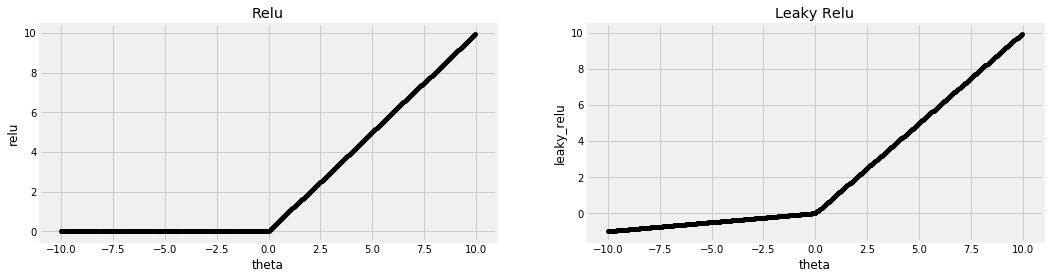

In [29]:
import numpy as np
import pandas as pd

fig, axs = plt.subplots(1, 2, figsize=(16, 4))

theta = np.arange(-10, 10, 0.05)
lrelu = leaky_relu(theta)
relu = np.maximum(0, theta)

pd.DataFrame(
    {
        'theta': theta,
        'relu': relu
    }
).plot(
    title='Relu', 
    kind='scatter', x='theta', y='relu', 
    color='k',
    ax=axs[0]
)


pd.DataFrame(
    {
        'theta': theta,
        'leaky_relu': lrelu
    }
).plot(
    title='Leaky Relu', 
    kind='scatter', x='theta', y='leaky_relu', 
    color='k',
    ax=axs[1]
)


# Convex Function

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:42: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


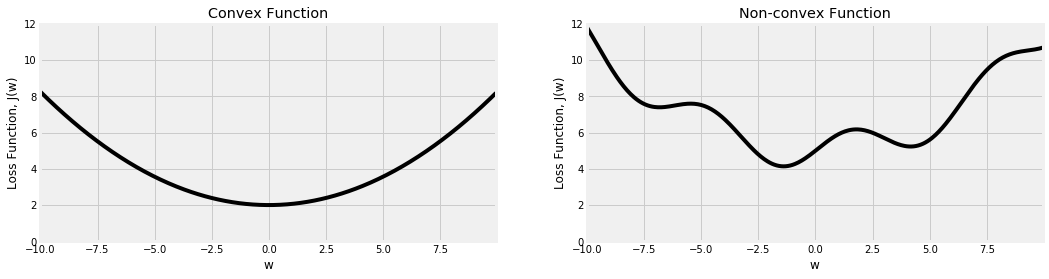

In [323]:
w = np.arange(-10, 10, 0.05)
y1 = np.sin(w)
y2 = 2 + (0.25*w)**2
y3 = (0.01*w) ** 3

y_convex = y2
y_nonconvex = 3 + y1 + y2 + y3


fig, axs = plt.subplots(1, 2, figsize=(16, 4))

pd.DataFrame(
    {
        'w': w,
        'y': y_convex,
    }
).set_index('w')['y'].plot(
    title='Convex Function',
    ylim=(0,12),
    color='k',
    ax=axs[0]
)

axs[0].set_ylabel('Loss Function, J(w)')

pd.DataFrame(
    {
        'w': w,
        'y': y_nonconvex,
    }
).set_index('w')['y'].plot(
    title='Non-convex Function',
    ylim=(0,12),
    color='k',
    ax=axs[1]
)

axs[1].set_ylabel('Loss Function, J(w)')



fig.show()

# Loading Data

In [4]:
from sklearn.datasets import fetch_openml
fashion_mnist = fetch_openml(data_id=40996)

In [5]:
fashion_mnist['data'].shape

(70000, 784)

In [6]:
dir(fashion_mnist)

['DESCR',
 'categories',
 'data',
 'details',
 'feature_names',
 'frame',
 'target',
 'target_names',
 'url']

In [7]:
fashion_mnist['target']

array(['9', '0', '0', ..., '8', '1', '5'], dtype=object)

In [8]:
fashion_mnist['data'].min(), fashion_mnist['data'].max(), 

(0.0, 255.0)

In [9]:
fashion_mnist['DESCR']

"**Author**: Han Xiao, Kashif Rasul, Roland Vollgraf  \n**Source**: [Zalando Research](https://github.com/zalandoresearch/fashion-mnist)  \n**Please cite**: Han Xiao and Kashif Rasul and Roland Vollgraf, Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms, arXiv, cs.LG/1708.07747  \n\nFashion-MNIST is a dataset of Zalando's article images, consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Fashion-MNIST is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits. \n\nRaw data available at: https://github.com/zalandoresearch/fashion-mnist\n\n### Target classes\nEach training and test example is assigned to one of the following labels:\nLabel  Description  \n0  T-shirt/top  \n1  Trouser  \n2  Pullover  \

In [10]:
help(''.rsplit)

Help on built-in function rsplit:

rsplit(...) method of builtins.str instance
    S.rsplit(sep=None, maxsplit=-1) -> list of strings
    
    Return a list of the words in S, using sep as the
    delimiter string, starting at the end of the string and
    working to the front.  If maxsplit is given, at most maxsplit
    splits are done. If sep is not specified, any whitespace string
    is a separator.



In [11]:
labels_s = '0  T-shirt/top  \n1  Trouser  \n2  Pullover  \n3  Dress  \n4  Coat  \n5  Sandal  \n6  Shirt  \n7  Sneaker  \n8  Bag  \n9  Ankle boot'

fashion_label_translation = {
    int(k): v for k, v in [
        item.split(maxsplit=1) for item in labels_s.split('\n')
    ]
}

fashion_label_translation


{0: 'T-shirt/top  ',
 1: 'Trouser  ',
 2: 'Pullover  ',
 3: 'Dress  ',
 4: 'Coat  ',
 5: 'Sandal  ',
 6: 'Shirt  ',
 7: 'Sneaker  ',
 8: 'Bag  ',
 9: 'Ankle boot'}

In [12]:
fashion_label_high_lebel_translation = {
    0: 'Apparel',
    1: 'Apparel',
    2: 'Apparel',
    3: 'Apparel',
    4: 'Apparel',
    5: 'Footwear',
    6: 'Apparel',
    7: 'Footwear',
    8: 'Accessory',
    9: 'Footwear',
}

In [13]:
def translate_label(y, translation=fashion_label_translation):
    return pd.Series(y).apply(
        lambda y: translation[int(y)]
    ).values

In [14]:
np.sqrt(fashion_mnist['data'].shape[1])

28.0

In [15]:
def display_fashion(img, target, ax):
    
    if len(img.shape):
        w = int(np.sqrt(img.shape[0]))
        img = img.reshape((w, w))
    
    ax.imshow(img, cmap='Greys')
    ax.set_title(f'{target}')
    ax.grid(False)

In [16]:
from sklearn.model_selection import train_test_split

fashion_mnist_sample = {}

fashion_mnist_sample['data'], _, fashion_mnist_sample['target'], _ = train_test_split(
    fashion_mnist['data'], fashion_mnist['target'], train_size=10000
)

x, y = fashion_mnist_sample['data'], fashion_mnist_sample['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [18]:
# translation = fashion_label_high_lebel_translation
translation = fashion_label_translation

y_train_translated = translate_label(y_train, translation=translation)
y_test_translated = translate_label(y_test, translation=translation)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


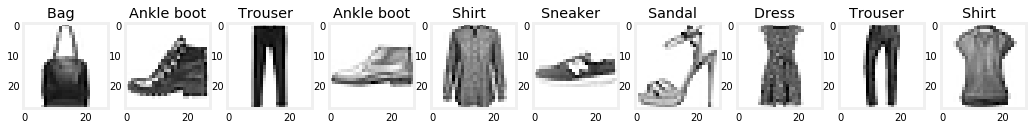

In [19]:
fig, axs = plt.subplots(1, 10, figsize=(16, 12))

import random 

for i in range(10):
    rand = random.choice(range(x_train.shape[0]))
    display_fashion(x_train[rand], y_train_translated[rand], axs[i])

fig.show()

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train_encoded = le.fit_transform(y_train_translated)
y_test_encoded = le.transform(y_test_translated)

In [25]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=500)
clf.fit(x_train, y_train_encoded)
y_test_pred = clf.predict(x_test)

In [26]:
from sklearn.metrics import precision_recall_fscore_support

micro_fscore = precision_recall_fscore_support(y_test_encoded, y_test_pred, average='micro')[2]
print(f'Micro FScore = {micro_fscore}')

p, r, f, s = precision_recall_fscore_support(y_test_encoded, y_test_pred)

pd.DataFrame(
    {
        'Precision': p,
        'Recall': r,
        'F': f,
        'Support': s,
    },
    index =le.classes_.tolist()
)

Micro FScore = 0.8635


,Precision,Recall,F,Support
Ankle boot,0.935484,0.961326,0.948229,181
Bag,0.938389,0.947368,0.942857,209
Coat,0.798165,0.776786,0.787330,224
Dress,0.828571,0.896907,0.861386,194
Pullover,0.744444,0.752809,0.748603,178
Sandal,0.948571,0.927374,0.937853,179
Shirt,0.697674,0.707547,0.702576,212
Sneaker,0.937500,0.942029,0.939759,207
T-shirt/top,0.817680,0.758974,0.787234,195
Trouser,0.990741,0.968326,0.979405,221


In [340]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=500)
clf.fit(x_train, y_train_encoded)
y_test_pred = clf.predict(x_test)

In [341]:
from sklearn.metrics import precision_recall_fscore_support

micro_fscore = precision_recall_fscore_support(y_test_encoded, y_test_pred, average='micro')[2]
print(f'Micro FScore = {micro_fscore}')

p, r, f, s = precision_recall_fscore_support(y_test_encoded, y_test_pred)

pd.DataFrame(
    {
        'Precision': p,
        'Recall': r,
        'F': f,
        'Support': s,
    },
    index =le.classes_.tolist()
)

Micro FScore = 0.856


,Precision,Recall,F,Support
Ankle boot,0.925373,0.934673,0.930000,199
Bag,0.978947,0.930000,0.953846,200
Coat,0.843137,0.803738,0.822967,214
Dress,0.875000,0.870813,0.872902,209
Pullover,0.754098,0.745946,0.750000,185
Sandal,0.894737,0.925743,0.909976,202
Shirt,0.636771,0.706468,0.669811,201
Sneaker,0.909524,0.909524,0.909524,210
T-shirt/top,0.793478,0.780749,0.787062,187
Trouser,0.968085,0.943005,0.955381,193


In [342]:
clf.n_iter_, len(clf.loss_curve_)

(107, 107)

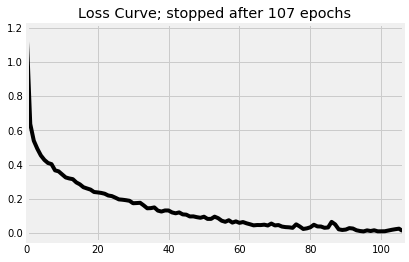

In [349]:
pd.Series(clf.loss_curve_).plot(title=f'Loss Curve; stopped after {clf.n_iter_} epochs', color='k')

1 0.1 0.01 0.001 0.0001 

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:42: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


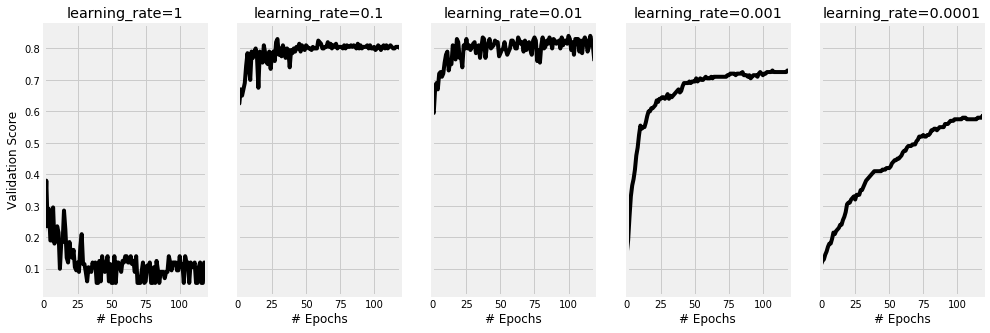

In [378]:
import warnings
from sklearn.exceptions import ConvergenceWarning

from sklearn.neural_network import MLPClassifier

learning_rate_init_options = [1, 0.1, 0.01, 0.001, 0.0001]

fig, axs = plt.subplots(1, len(learning_rate_init_options), figsize=(15, 5), sharex=True, sharey=True)

for i, learning_rate_init in enumerate(learning_rate_init_options):
    
    print(f'{learning_rate_init} ', end='')
    
    clf = MLPClassifier(
        hidden_layer_sizes=(500, ), 
        learning_rate='constant',
        learning_rate_init=learning_rate_init,
        validation_fraction=0.2,
        early_stopping=True, # Set to True to get clf.validation_scores_
        n_iter_no_change=120,
        momentum=0,
        max_iter=120, 
        solver='sgd',
        batch_size=25,
        verbose=0,
    )
    
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
        clf.fit(x_train[:1000,:], y_train_encoded[:1000])
        
    pd.Series(clf.validation_scores_).plot(
        title=f'learning_rate={learning_rate_init}', 
        kind='line', 
        color='k',
        ax=axs[i]
    )
    
    axs[i].set_xlabel('# Epochs')
    axs[i].set_ylabel('Validation Score')
    
fig.show()

1 10 100 1500 

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:42: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


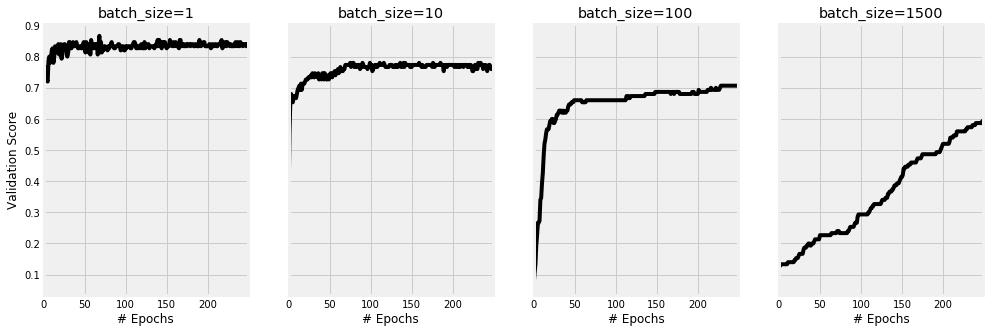

In [377]:
import warnings
from sklearn.exceptions import ConvergenceWarning

from sklearn.neural_network import MLPClassifier

batch_sizes = [1, 10, 100, 1500]

fig, axs = plt.subplots(1, len(batch_sizes), figsize=(15, 5), sharex=True, sharey=True)

for i, batch_size in enumerate(batch_sizes):
    
    print(f'{batch_size} ', end='')
    
    clf = MLPClassifier(
        hidden_layer_sizes=(500, ), 
        learning_rate='constant',
        learning_rate_init=0.001, 
        momentum=0,
        max_iter=250, 
        early_stopping=True,
        n_iter_no_change=250,
        solver='sgd',
        batch_size=batch_size,
        verbose=0,
    )
    
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
        clf.fit(x_train[:1500,:], y_train_encoded[:1500])
        
    # pd.Series(clf.loss_curve_).plot( 
    pd.Series(clf.validation_scores_).plot( 
        title=f'batch_size={batch_size}',
        color='k',
        kind='line', 
        ax=axs[i]
    )
    
    axs[i].set_xlabel('# Epochs')
    axs[i].set_ylabel('Validation Score')
    
fig.show()

1 0.1 0.01 

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


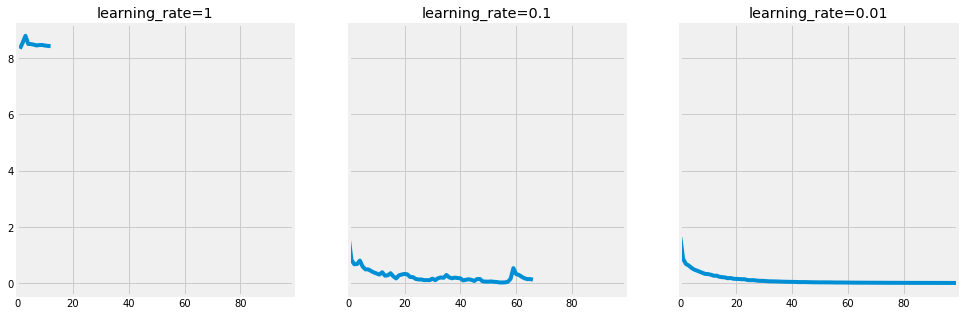

In [249]:
import warnings
from sklearn.exceptions import ConvergenceWarning

from sklearn.neural_network import MLPClassifier

learning_rate_init_options = [1, 0.1, 0.01]

fig, axs = plt.subplots(1, len(learning_rate_init_options), figsize=(15, 5), sharex=True, sharey=True)

for i, learning_rate_init in enumerate(learning_rate_init_options):
    
    print(f'{learning_rate_init} ', end='')
    
    clf = MLPClassifier(
        hidden_layer_sizes=(500, ), 
        learning_rate='constant',
        learning_rate_init=learning_rate_init,
        max_iter=100, 
        solver='sgd',
        batch_size=25,
        n_iter_no_change=10,
        verbose=0,
    )
    
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
        clf.fit(x_train[:500,:], y_train_encoded[:500])
        
    pd.Series(clf.loss_curve_).plot(
        title=f'learning_rate={learning_rate_init}', 
        kind='line', 
        color='k',
        ax=axs[i]
    )
    
fig.show()

## More Data?

In [384]:
x_train.shape, x_test.shape

((8000, 784), (2000, 784))

In [380]:
from sklearn.model_selection import learning_curve

train_sizes = [1, 0.75, 0.5, 0.25, 0.1, 0.05]

train_sizes, train_scores, test_scores = learning_curve(
    MLPClassifier(
        hidden_layer_sizes=(100, 100), 
        solver='adam',
        early_stopping=False
    ), 
    x_train, y_train_encoded,
    train_sizes=train_sizes,
    scoring="precision_macro",
    cv=3,
    verbose=2,
    n_jobs=-1
)


[learning_curve] Training set sizes: [ 266  533 1333 2666 3999 5333]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  18 | elapsed:   43.6s remaining:   43.6s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.4min finished


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


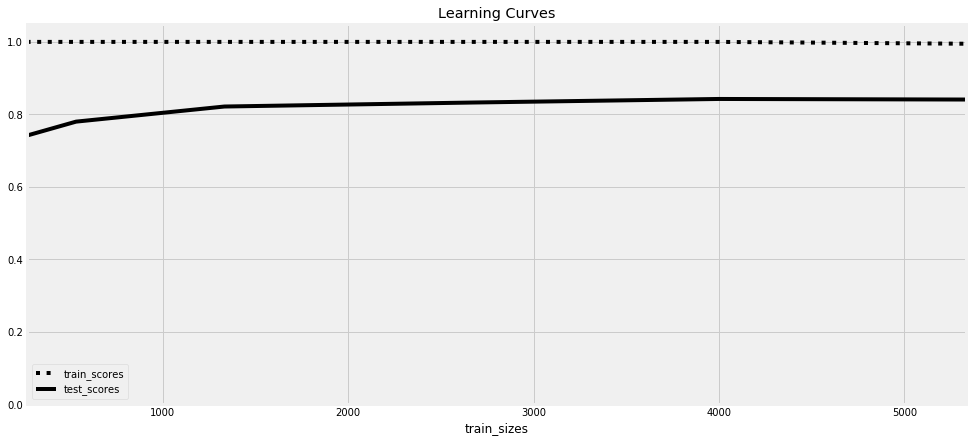

In [382]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))

df_learning_curve = pd.DataFrame(
    {
        'train_sizes': train_sizes,
        'train_scores': train_scores.mean(axis=1),
        'test_scores': test_scores.mean(axis=1)
    }
).set_index('train_sizes')

df_learning_curve['train_scores'].plot(
    title='Learning Curves',
    kind='line',
    ls=':',
    c='k',
    ylim=(0,1.05),
    ax=ax
)

df_learning_curve['test_scores'].plot(
    title='Learning Curves',
    kind='line',
    ls='-',
    c='k',
    ylim=(0,1.05),
    ax=ax
)

ax.legend()

fig.show()

## More Iteration?

In [385]:
from sklearn.model_selection import validation_curve

max_iter_range = [5, 10, 25, 50, 75, 100, 150]

train_scores, test_scores = validation_curve(
    MLPClassifier(
        hidden_layer_sizes=(100, 100), 
        solver='adam',
        early_stopping=False
    ), 
    x_train, y_train_encoded,
    param_name="max_iter", param_range=max_iter_range,
    scoring="precision_macro",
    cv=3,
    verbose=2,
    n_jobs=-1
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  21 | elapsed:   51.8s remaining:   47.1s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:  1.5min finished


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


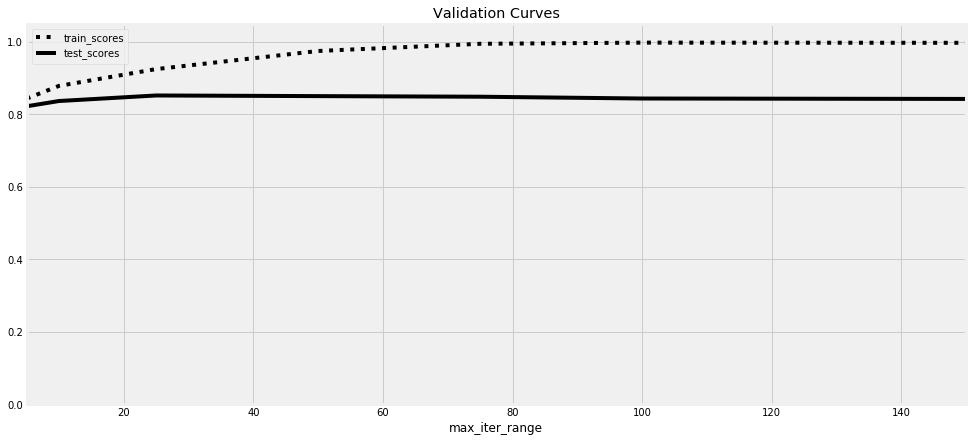

In [387]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))

df_validation_curve = pd.DataFrame(
    {
        'max_iter_range': max_iter_range,
        'train_scores': train_scores.mean(axis=1),
        'test_scores': test_scores.mean(axis=1)
    }
).set_index('max_iter_range')

df_validation_curve['train_scores'].plot(
    title='Validation Curves',
    kind='line',
    ls=':',
    c='k',
    ylim=(0,1.05),
    ax=ax
)

df_validation_curve['test_scores'].plot(
    title='Validation Curves',
    kind='line',
    ls='-',
    c='k',
    ylim=(0,1.05),
    ax=ax
)

ax.legend()

fig.show()

# Architecture + GridSearchCV

In [405]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(50,), (50, 50), (100, 50), (100, 100), (500, 100), (500, 100, 100)],
    'activation': ['logistic', 'tanh', 'relu'],
    'learning_rate_init': [0.01, 0.001],
    'solver': ['sgd', 'adam'],
}

gs = GridSearchCV(
    estimator=MLPClassifier(
        max_iter=50,
        batch_size=50,
        early_stopping=True,
    ), 
    param_grid=param_grid,
    cv=4,
    verbose=2,
    n_jobs=-1
)
 
gs.fit(x_train[:2500,:], y_train_encoded[:2500])


Fitting 4 folds for each of 72 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed: 14.1min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size=50, beta_1=0.9, beta_2=0.999,
                                     early_stopping=True, epsilon=1e-08,
                                     hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=50, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None,...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'hidden_layer

In [406]:
gs.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (500, 100),
 'learning_rate_init': 0.01,
 'solver': 'adam'}

In [407]:
y_test_predict = gs.predict(x_test)

In [413]:
from sklearn.metrics import precision_recall_fscore_support

micro_fscore = precision_recall_fscore_support(y_test_encoded, y_test_pred, average='micro')[2]
print(f'Micro FScore = {micro_fscore}')

p, r, f, s = precision_recall_fscore_support(y_test_encoded, y_test_pred)

pd.DataFrame(
    {
        'Precision': p,
        'Recall': r,
        'F': f,
        'Support': s,
    },
    index =le.classes_.tolist()
).round(2).style.bar(subset=['Precision', 'Recall', 'F'], align='mid', color='#CCCCCC')

Micro FScore = 0.856


,Precision,Recall,F,Support
Ankle boot,0.93,0.93,0.93,199
Bag,0.98,0.93,0.95,200
Coat,0.84,0.8,0.82,214
Dress,0.88,0.87,0.87,209
Pullover,0.75,0.75,0.75,185
Sandal,0.89,0.93,0.91,202
Shirt,0.64,0.71,0.67,201
Sneaker,0.91,0.91,0.91,210
T-shirt/top,0.79,0.78,0.79,187
Trouser,0.97,0.94,0.96,193


# Kernels

In [101]:
from scipy import ndimage

def convolve(x, kernel=[[0,-1,0], [-1,5,-1], [0,-1,0]]):
    w = int(np.sqrt(x.shape[1]))
    x = ndimage.convolve(x.reshape((x.shape[0], w, w)), [kernel], mode='reflect', cval=0.0) 
    x = x.reshape(x.shape[0], x.shape[1]*x.shape[2]) 
    return x

In [102]:
k_sharpen = [[0,-1,0], [-1,5,-1], [0,-1,0]]
k_box_blur = [[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]]
k_box_blur2 = [[1/16,1/16,1/16,1/16],[1/16,1/4,1/4,1/16], [1/16,1/4,1/4,1/16], [1/16,1/16,1/16,1/16]]
k_smooth = [[0.1,0.1,0.1],[0.1,0.2,0.1],[0.1,0.1,0.1]]
k_gaussian_blur = [[1,2,1], [2,4,2], [1,2,1]]
k_edge = [[1,1,1],[1,-8,1],[1,1,1]]
k_hline = [[-1,-1,-1],[2,2,2],[-1,-1,-1]]
k_vline = [[-1,2,-1],[-1,2,-1],[-1,2,-1]]
k_wtf = [[1,-1],[-1,0]]

kernel = k_box_blur

x_train_conv = convolve(x_train, kernel)
x_test_conv = convolve(x_test, kernel) 

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


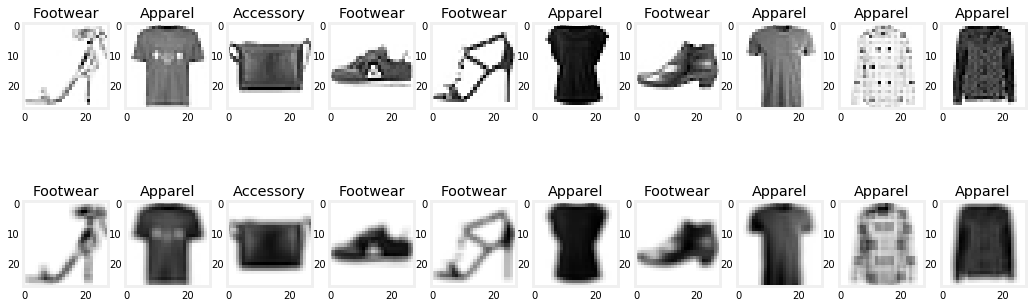

In [103]:
fig, axs = plt.subplots(2, 10, figsize=(16, 6))

import random 

for i in range(10):
    rand = random.choice(range(x_train.shape[0]))
    display_fashion(x_train[rand], y_train_translated[rand], axs[0][i])
    display_fashion(x_train_conv[rand], y_train_translated[rand], axs[1][i])

fig.show()

In [47]:
multiplier = np.ones(10)
multiplier[ np.array(range(10))  > 4]

array([1., 1., 1., 1., 1.])

# Custom Activation

In [60]:
leaky_relu_slope = 0.01

def leaky_relu(X):
    X_min = leaky_relu_slope * np.array(X)
    return np.clip(X, X_min, np.finfo(X.dtype).max)

def inplace_leaky_relu_derivative(Z, delta):
    delta[Z < 0] = leaky_relu_slope * delta[Z < 0]

In [61]:
from sklearn.neural_network._base import ACTIVATIONS, DERIVATIVES

ACTIVATIONS['leaky_relu'] = leaky_relu
DERIVATIVES['leaky_relu'] = inplace_leaky_relu_derivative

In [62]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(100, 100, 50), activation='leaky_relu', max_iter=150)
clf.fit(x_train, y_train_encoded)
y_test_pred = clf.predict(x_test)

In [63]:
from sklearn.metrics import precision_recall_fscore_support

micro_fscore = precision_recall_fscore_support(y_test_encoded, y_test_pred, average='micro')[2]
print(f'Micro FScore = {micro_fscore}')

p, r, f, s = precision_recall_fscore_support(y_test_encoded, y_test_pred)

pd.DataFrame(
    {
        'Precision': p,
        'Recall': r,
        'F': f,
        'Support': s,
    },
    index =le.classes_.tolist()
).round(2).style.bar(subset=['Precision', 'Recall', 'F'], align='mid', color='#CCCCCC')

Micro FScore = 0.8525


,Precision,Recall,F,Support
Ankle boot,0.95,0.92,0.94,181
Bag,0.93,0.95,0.94,209
Coat,0.72,0.85,0.78,224
Dress,0.87,0.85,0.86,194
Pullover,0.7,0.75,0.72,178
Sandal,0.94,0.93,0.93,179
Shirt,0.73,0.58,0.65,212
Sneaker,0.92,0.94,0.93,207
T-shirt/top,0.79,0.79,0.79,195
Trouser,0.98,0.97,0.97,221


In [64]:
clf = MLPClassifier(hidden_layer_sizes=(100, 100, 50), activation='relu', max_iter=150)
clf.fit(x_train, y_train_encoded)
y_test_pred = clf.predict(x_test)

In [65]:
from sklearn.metrics import precision_recall_fscore_support

micro_fscore = precision_recall_fscore_support(y_test_encoded, y_test_pred, average='micro')[2]
print(f'Micro FScore = {micro_fscore}')

p, r, f, s = precision_recall_fscore_support(y_test_encoded, y_test_pred)

pd.DataFrame(
    {
        'Precision': p,
        'Recall': r,
        'F': f,
        'Support': s,
    },
    index =le.classes_.tolist()
).round(2).style.bar(subset=['Precision', 'Recall', 'F'], align='mid', color='#CCCCCC')

Micro FScore = 0.847


,Precision,Recall,F,Support
Ankle boot,0.95,0.94,0.95,181
Bag,0.98,0.91,0.95,209
Coat,0.79,0.69,0.74,224
Dress,0.85,0.91,0.88,194
Pullover,0.68,0.78,0.73,178
Sandal,0.94,0.91,0.92,179
Shirt,0.6,0.72,0.65,212
Sneaker,0.91,0.96,0.93,207
T-shirt/top,0.88,0.7,0.78,195
Trouser,0.97,0.97,0.97,221
